# Biblioteka Qiskit wprowadzenie


```bash
python3 -m venv venv
source venv/bin/activate
# Scripts\Activate

pip install qiskit==0.44.1
pip install qiskit[visualization]
# pip install 'qiskit[visualization]'
pip install qiskit_aer==0.12.2
pip install qiskit_machine_learning==0.6.1
pip install qiskit-finance==0.3.4
pip install qiskit-ibmq-provider==0.20.2
pip install qiskit-ignis==0.7.1
pip install qiskit-algorithms==0.2.1
```
The other important libs.

```bash
pip install pylatexenc ipywidgets qutip
pip install scikit-learn numpy scipy matplotlib 
pip install ipython pandas sympy nose seaborn jupyter notebook jupyterlab
```

In [42]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

## Qiskit podstawy

Tworzenie rejestrów:

1. kwantowego `QuantumRegister` - do inicjalizowania kubitów. Kubity domyślnie inicjalizowane są w stanie $|0\rangle$
2. klasycznego `ClassicalRegister` do przechowywania wyników pomiarów kubitów. Po pomiarze otrzymywany wynik zawsze jest binarny $\{0,1\}$.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

Oba rejestry wykorzystywane będą do generowania obwodów kwantowych `QuantumCircuit`.

Wszystkie podstawowe obiekty dostępne są bezpośrednio w bibliotece `qiskit`.

In [3]:
qreq = QuantumRegister(4) # rejest kwantowy z 4 qubitami

In [4]:
creg = ClassicalRegister(4) # rejestr klasyczny z 4 bitami

In [5]:
circuit = QuantumCircuit(qreq, creg) # obwód kwantowy z 4 qubitami i 4 bitami

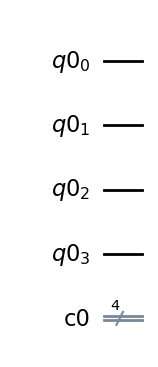

In [6]:
circuit.draw('mpl') # funkcja rysująca obwód

In [7]:
output = QuantumRegister(1) # inny rejestr kwantowy z 1 qubitem

In [8]:
circuit2 = QuantumCircuit(qreq, output, creg)

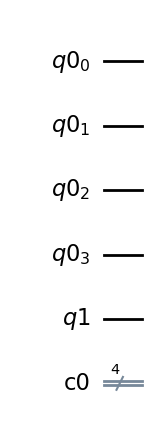

In [9]:
circuit2.draw("mpl")

In [10]:
circuit3 = QuantumCircuit(qreq)

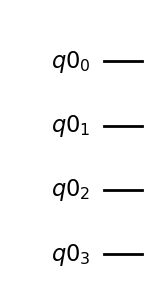

In [11]:
circuit3.draw('mpl')

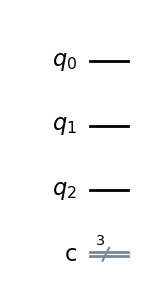

In [12]:
circuit4 = QuantumCircuit(3,3)
circuit4.draw("mpl")

In [13]:
from qiskit_aer.primitives import Sampler

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

bell = QuantumCircuit(2)
bell.h(0)
bell.measure_all()
 
# execute the quantum circuit
quasi_dists = Sampler().run(bell, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{1: 0.504, 0: 0.496}


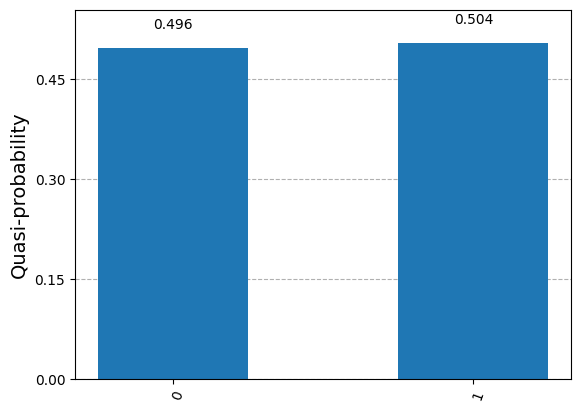

In [14]:
plot_histogram(quasi_dists)

### Pomiar w obwodzie i wielokrotne uruchamianie układu

## Tworzenie stanu jednokubitowego 


$$
\ket{\psi}=\ket{0}
$$

Do inspekcji stanu układu (bez jego pomiaru) mozemy uzyć backend `statevector_simulator`.

In [16]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
 
# Create a Bell state for demonstration
qc = QuantumCircuit(1)
psi = Statevector(qc)

In [ ]:
psi.draw('latex') # metoda wypisująca wektor stanu w latexu

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector(qc)
state.draw('latex')

In [ ]:
plot_bloch_multivector(state)

### inicjalizacja stanu


In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [ ]:
state = Statevector(qc)
state.draw('latex')

In [ ]:
initial_state = [1,1]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result.draw('latex')

In [ ]:
from math import sqrt
initial_state = [1/sqrt(2),1/sqrt(2)]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = Statevector(qc)
result.draw('latex')

In [ ]:
from math import sqrt
initial_state = [1/2,sqrt(3)/2]
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
result = Statevector(qc)
result.draw('latex')

In [17]:
from math import pi, cos, sin 
def get_state(theta):
    return [cos(theta/2), sin(theta/2)]

theta = -pi/2

qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0)
result = Statevector(qc)
result.draw('latex')

<IPython.core.display.Latex object>

In [20]:
# execute the quantum circuit
qc.measure_all()
quasi_dists = Sampler().run(qc, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{0: 0.475, 1: 0.525}


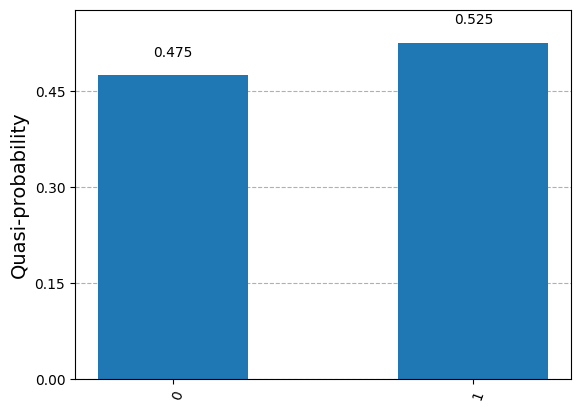

In [21]:
plot_histogram(quasi_dists)

## Tworzenie stanu dwukubitowego
 

$$
\ket{00}, \ket{01}, \ket{10}, \ket{11}
$$


In [ ]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
state.draw('latex')

In [ ]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.h(qr[1])
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()
state.draw('latex')

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result.get_statevector())

In [25]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(0,1)

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
state = result.get_statevector()

In [ ]:
qc.draw('mpl')

In [ ]:
state.draw('latex')

In [ ]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result.get_statevector())

## Tworzenie stanu trzy-kubitowego 

$$
\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}$$

In [29]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
# qc.x(qr[0]) 
# qc.x(qr[1])

# klasyczny symulator pozwala zobaczyc stan
backend = Aer.get_backend('statevector_simulator')
job=execute(qc, backend)
result = job.result()
state = result.get_statevector()

Uruchom powyższy kod usuwajac poszczegolne komentarze i sprawdz wynik.


In [ ]:
# uruchom w środowisku IBM Quantum Experience
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account(token=MY_API_TOKEN)
provider = IBMProvider()

# Create a circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Select a backend.
backend = provider.get_backend("ibmq_qasm_simulator")

# Transpile the circuit
transpiled = transpile(qc, backend=backend)

# Submit a job.
job = backend.run(transpiled)
# Get results.
print(job.result().get_counts())

Więcej informacji znajdziesz [tutaj](https://github.com/Qiskit/qiskit-ibm-provider/blob/stable/0.7/docs/tutorials/Migration_Guide_from_qiskit-ibmq-provider.ipynb#)

In [ ]:
from qiskit.tools.visualization import circuit_drawer

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.measure(q, c)
circuit_drawer(circuit)